In [17]:
def align(mapping, y):
    y_aligned = []
    for pairing in mapping:
        item = y[pairing[1]]
        y_aligned.append(item)
    return y_aligned

In [33]:
import matplotlib.pyplot as plt

def plot_alignment(x, y_orig, y_aligned):
    plt.plot(range(len(x)), x, label="x")
    plt.plot(range(len(y_orig)), y_orig, label="y_orig")
    plt.plot(range(len(y_aligned)), y_aligned, label="y_aligned")
    plt.legend()
    plt.show()

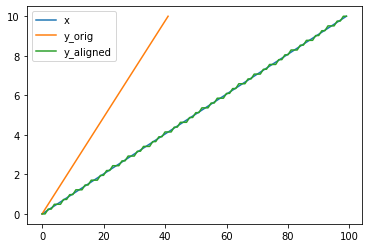

In [34]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 42)
distance, path = fastdtw(x, y, dist=euclidean)

y_aligned = align(path, y)
    
plot_alignment(x, y, y_aligned)

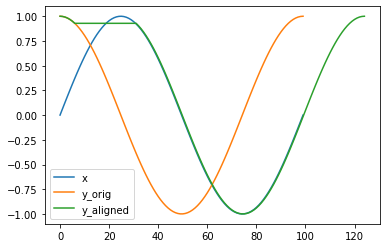

In [36]:
import math
x = np.linspace(0, 2 * math.pi, 100)
y_1 = np.sin(x)
y_2 = np.cos(x)
distance, path = fastdtw(y_1, y_2, dist=euclidean)
y_aligned = align(path, y_2)
plot_alignment(y_1, y_2, y_aligned)


Note that even though both original series are of the same lengths, y_aligned is longer than y_2, because DTW can only repeat some entries of y_2 and does not delete any.

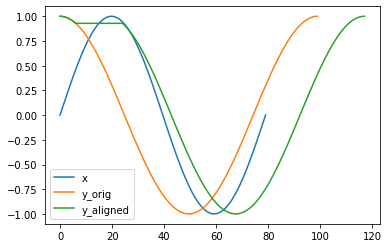

In [40]:
x_1 = np.linspace(0, 2 * math.pi, 80)
y_1 = np.sin(x_1)
x_2 = np.linspace(0, 2 * math.pi, 100)
y_2 = np.cos(x_2)
distance, path = fastdtw(y_1, y_2, dist=euclidean)
y_aligned = align(path, y_2)
plot_alignment(y_1, y_2, y_aligned)

Note that y_1 (the reference series) is shorter than y_2. The algorithm does not omit values from y_2 (cannot make it shorter). Instead, it repeats some values of y_2 to minimize the distance, making y_2 longer than it was.